<b>note from Brian:</b>

as far as I can tell by initial inspection-powers are not very destructive, which is very good

Plot (k, p@k) and (k, wp@k) curves for each power

if the weighted and unweighted curves converge for large k, it suggests that the weighting penalizes only high-bias examples. Then we can pick a proper value for p, fix the target metric (AUC, perhaps) and then tune hyperparameters on the next run

In [1]:
%pylab inline
%autosave 25

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Autosaving every 25 seconds


In [32]:
data = 'p_at_k_data/target_metric.csv'
df = pd.read_csv(data)
df.head()

,p,k,sum_of_weights^p,p@k,weighted_p@k
0,1,1,0.858978,1.000000,1.000000
1,1,11,7.486839,1.000000,1.000000
2,1,21,15.367306,0.952381,0.939505
3,1,31,23.035321,0.935484,0.920885
4,1,41,30.499883,0.902439,0.885134


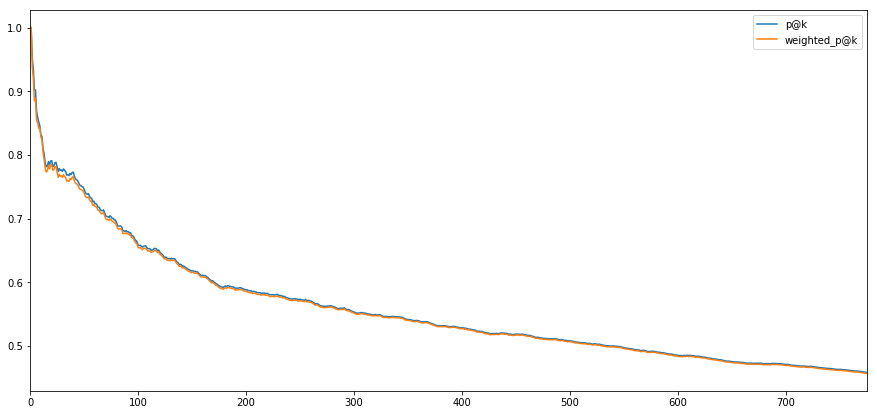

In [33]:
fig, ax = plt.subplots(figsize=(15,7))
_ = df[df['p']==1][['p@k', 'weighted_p@k']].plot(ax=ax)

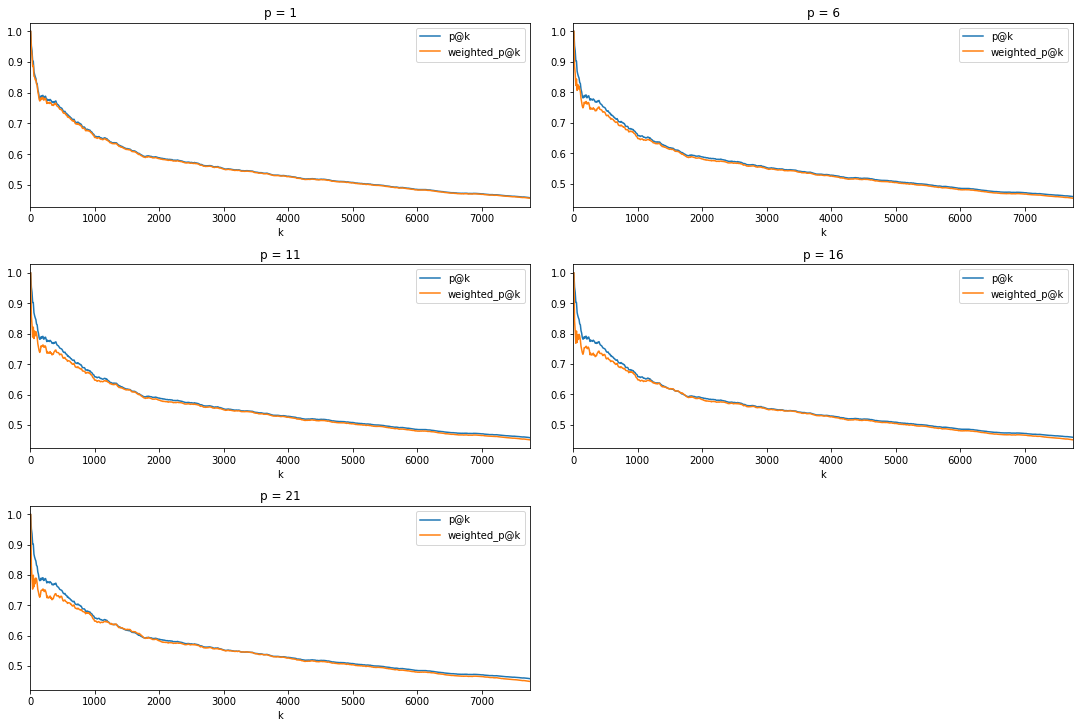

In [119]:
fig, axs = plt.subplots(3, 2, figsize=(15,10), constrained_layout=True)

for i, p in enumerate(df['p'].unique()):
    ax = axs[int(i/2), i%2]
    ax.set_title('p = {}'.format(p))
    df[df['p']==p][['k', 'p@k', 'weighted_p@k']].plot(x='k', ax=ax)

_ = axs[-1, -1].axis('off')

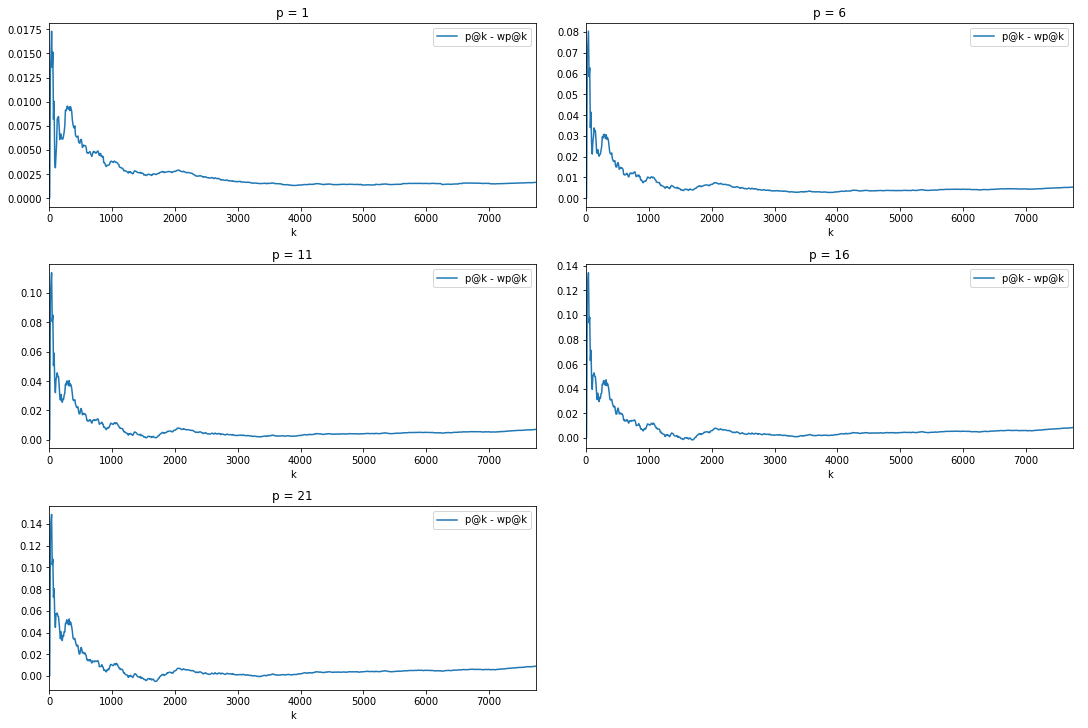

In [120]:
fig, axs = plt.subplots(3, 2, figsize=(15,10), constrained_layout=True)

df['p@k - wp@k'] = df['p@k'] - df['weighted_p@k']

for i, p in enumerate(df['p'].unique()):
    ax = axs[int(i/2), i%2]
    ax.set_title('p = {}'.format(p))
    df[df['p']==p][['k', 'p@k - wp@k']].plot(x='k', ax=ax)

_ = axs[-1, -1].axis('off')

### Plot LDA metric product across binary and contiuous, pid and cid data

In [2]:
data = 'LDA_metrics/cid_v5_LDA_continuous.csv'
df_cont_cid = pd.read_csv(data)
df_cont_cid.head()

,cid,pid,latent_prob_delta_ratio,latent_prob_neg,latent_prob_pos,latent_prob_delta
0,938,AAB59829,0.999317,0.955786,0.956439,0.000653
1,938,P9WFX0,0.999317,0.955786,0.956439,0.000653
2,938,P09622,0.999317,0.955786,0.956439,0.000653
3,938,P50591,0.999317,0.955786,0.956439,0.000653
4,938,Q8TDS4,0.999317,0.955786,0.956439,0.000653


In [3]:
data = 'LDA_metrics/pid_v5_LDA_continuous.csv'
df_cont_pid = pd.read_csv(data)
df_cont_pid.head()

,cid,pid,latent_prob_delta_ratio,latent_prob_neg,latent_prob_pos,latent_prob_delta
0,938,AAB59829,0.996154,0.803432,0.800348,0.003084
1,1986,AAB59829,0.996154,0.803432,0.800348,0.003084
2,37542,AAB59829,0.996154,0.803432,0.800348,0.003084
3,445580,AAB59829,0.996154,0.803432,0.800348,0.003084
4,4100,AAB59829,0.996154,0.803432,0.800348,0.003084


In [4]:
data = '../data/validation_interactions_v5.csv'
df = pd.read_csv(data)
df.head()

,Unnamed: 0,cid,pid,activity,cid_binary_weights,pid_binary_weights
0,0,938,AAB59829,1,0.952894,0.996703
1,1,1986,AAB59829,1,0.975912,0.996703
2,2,37542,AAB59829,0,0.963498,0.996703
3,3,445580,AAB59829,0,0.973330,0.996703
4,4,4100,AAB59829,0,0.923492,0.996703


In [5]:
df_cont_cid['cid_latent_prob_delta_ratio'] = df_cont_cid['latent_prob_delta_ratio']
df_cont_pid['pid_latent_prob_delta_ratio'] = df_cont_pid['latent_prob_delta_ratio']

In [6]:
merged_df = pd.merge(df_cont_cid, df_cont_pid,  how='inner', on=['cid','pid'])

In [7]:
merged_df.head()

,cid,pid,latent_prob_delta_ratio_x,latent_prob_neg_x,latent_prob_pos_x,latent_prob_delta_x,cid_latent_prob_delta_ratio,latent_prob_delta_ratio_y,latent_prob_neg_y,latent_prob_pos_y,latent_prob_delta_y,pid_latent_prob_delta_ratio
0,938,AAB59829,0.999317,0.955786,0.956439,0.000653,0.999317,0.996154,0.803432,0.800348,0.003084,0.996154
1,938,P9WFX0,0.999317,0.955786,0.956439,0.000653,0.999317,0.995031,0.530269,0.527641,0.002629,0.995031
2,938,P09622,0.999317,0.955786,0.956439,0.000653,0.999317,0.997549,0.476798,0.475631,0.001167,0.997549
3,938,P50591,0.999317,0.955786,0.956439,0.000653,0.999317,0.995514,0.424504,0.422604,0.001900,0.995514
4,938,Q8TDS4,0.999317,0.955786,0.956439,0.000653,0.999317,0.996288,0.682657,0.680127,0.002529,0.996288


In [8]:
merged_df = pd.merge(merged_df, df,  how='inner', on=['cid','pid'])

In [9]:
len(merged_df)

8024

In [10]:
merged_df.head()

,cid,pid,latent_prob_delta_ratio_x,latent_prob_neg_x,latent_prob_pos_x,latent_prob_delta_x,cid_latent_prob_delta_ratio,latent_prob_delta_ratio_y,latent_prob_neg_y,latent_prob_pos_y,latent_prob_delta_y,pid_latent_prob_delta_ratio,Unnamed: 0,activity,cid_binary_weights,pid_binary_weights
0,938,AAB59829,0.999317,0.955786,0.956439,0.000653,0.999317,0.996154,0.803432,0.800348,0.003084,0.996154,0,1,0.952894,0.996703
1,938,P9WFX0,0.999317,0.955786,0.956439,0.000653,0.999317,0.995031,0.530269,0.527641,0.002629,0.995031,70,1,0.952894,0.996648
2,938,P09622,0.999317,0.955786,0.956439,0.000653,0.999317,0.997549,0.476798,0.475631,0.001167,0.997549,130,1,0.952894,0.989984
3,938,P50591,0.999317,0.955786,0.956439,0.000653,0.999317,0.995514,0.424504,0.422604,0.001900,0.995514,137,1,0.952894,0.999389
4,938,Q8TDS4,0.999317,0.955786,0.956439,0.000653,0.999317,0.996288,0.682657,0.680127,0.002529,0.996288,148,1,0.952894,0.991207


In [11]:
merged_df['target'] = \
    merged_df['cid_latent_prob_delta_ratio']* \
    merged_df['pid_latent_prob_delta_ratio']* \
    merged_df['cid_binary_weights']* \
    merged_df['pid_binary_weights']

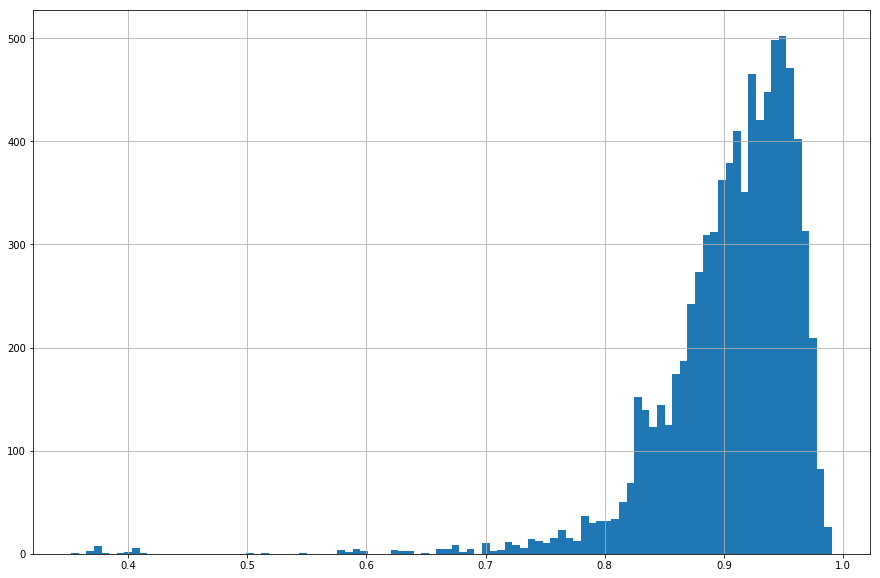

In [12]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
_ = merged_df['target'].hist(bins=100)

### Fit KDE

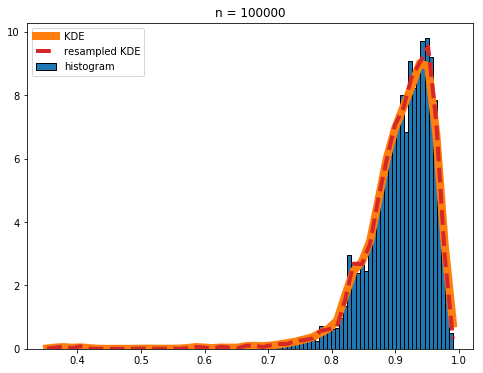

In [13]:
import scipy.stats as sts

n = 100000
samples = merged_df['target']

# generate some random multimodal histogram data
h,e = np.histogram(samples, bins=100, density=True)
x = np.linspace(e.min(), e.max())

# plot the histogram
plt.figure(figsize=(8,6))
plt.bar(e[:-1], h, width=np.diff(e), ec='k', align='edge', label='histogram')

# plot the real KDE
kde = sts.gaussian_kde(samples)
plt.plot(x, kde.pdf(x), c='C1', lw=8, label='KDE')

# resample the histogram and find the KDE.
resamples = np.random.choice((e[:-1] + e[1:])/2, size=n*5, p=h/h.sum())
rkde = sts.gaussian_kde(resamples)

# plot the KDE
plt.plot(x, rkde.pdf(x), '--', c='C3', lw=4, label='resampled KDE')
plt.title('n = %d' % n)
plt.legend()
plt.show()

### Fit Gamma distribution

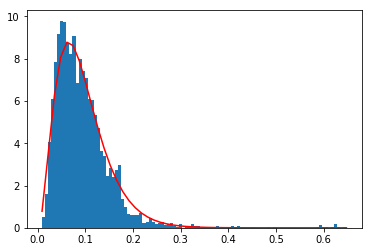

In [19]:
import scipy.stats as stats

gamma = stats.gamma
y = 1-merged_df['target']

h,e = np.histogram(y, bins=100, density=True)
x = np.linspace(e.min(), e.max())
# fit
param = gamma.fit(y, floc=0.0)
pdf_fitted = gamma.pdf(x, *param)
plt.plot(x, pdf_fitted, color='r')

# plot the histogram
plt.hist(y, normed=True, bins=100)

_ = plt.show()

In [15]:
param

(3.2081715776676396, 0.0, 0.029356905842396603)

### Generate new Gamma distribution by tweaking the fitted Gamma parameters.

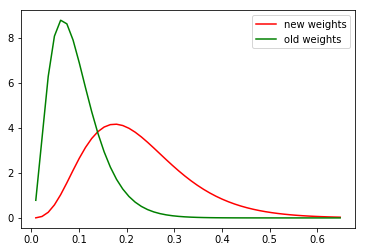

In [59]:
import matplotlib.pyplot as plt
import scipy.special as sps

params = (4.5, 0.0, 0.05)

h,e = np.histogram(y, bins=100, density=True)
x = np.linspace(e.min(), e.max())

pdf_new = gamma.pdf(x, *params)

plt.plot(x, pdf_new, color='r', label='new weights')
plt.plot(x, pdf_fitted, color='g', label='old weights')
plt.legend()

plt.show()

In [45]:
gamma.ppf(q=0.9999, a=params[0], loc=params[1], scale=params[2])

0.8429987109741227

In [46]:
gamma.cdf(x=0.8429987109741227, a=params[0], loc=params[1], scale=params[2])

0.9999

### Generate new weights from the new Gamma distribution and compare to p@k

Instead of using power to spread out the distribution of the LDA ratio weights, we'll use the gammma.ppf() of the normalised weight rank as the new weight for p@k.

In [35]:
df_probabilities = pd.read_csv('p_at_k_data/probabilities.csv')
df_probabilities.sort_values(by='combined_predict_proba', ascending=False, inplace=True)

In [36]:
df_probabilities.head()

,used_dim_red_weights,cid,pid,activity,cid_only_predict_proba,pid_only_predict_proba,combined_predict_proba,latent_prob_delta_ratio
7627,False,3007855,P06727,1,0.991145,0.833986,0.991584,0.858978
7400,False,23978,P29034,1,0.989927,0.866058,0.990514,0.600000
7398,False,23978,Q07021,1,0.989927,0.223583,0.990496,0.600000
3108,False,2767,O15244,1,0.951649,0.352868,0.990471,0.846154
7399,False,23978,Q14061,1,0.989927,0.555466,0.988801,0.600000


In [50]:
start_k = 1
end_k = len(df_probabilities)
k_inc = 10

results = []

df_probabilities['weight_rank'] = df_probabilities['latent_prob_delta_ratio'].rank()
df_probabilities['weight_rank'] = df_probabilities['weight_rank']/df_probabilities['weight_rank'].max()

# Avoid having the max normalized rank = 1 since the gamma ppf will return inf for that. 
df_probabilities['weight_rank'] = df_probabilities['weight_rank'] - df_probabilities['weight_rank'].min()

for k in range(start_k, end_k, k_inc):
    v = df_probabilities[:k][(df_probabilities['activity'] == 1.0)]
    sum_of_weights_p = v['weight_rank'].sum()
    p_at_k = v['activity'].sum()/k
    weighted_p_at_k = sum_of_weights_p/df_probabilities[:k]['weight_rank'].sum()
    result = [k, sum_of_weights_p, p_at_k, weighted_p_at_k]
    results.append(result)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [48]:
df_probabilities.head()

,used_dim_red_weights,cid,pid,activity,cid_only_predict_proba,pid_only_predict_proba,combined_predict_proba,latent_prob_delta_ratio,weight_rank
7627,False,3007855,P06727,1,0.991145,0.833986,0.991584,0.858978,0.032549
7400,False,23978,P29034,1,0.989927,0.866058,0.990514,0.600000,0.003545
7398,False,23978,Q07021,1,0.989927,0.223583,0.990496,0.600000,0.003545
3108,False,2767,O15244,1,0.951649,0.352868,0.990471,0.846154,0.027844
7399,False,23978,Q14061,1,0.989927,0.555466,0.988801,0.600000,0.003545


In [51]:
df_probabilities['weight_rank'].max()

0.9990976474379633

In [57]:
df_results = pd.DataFrame(results, columns=['k', 'sum_of_weights_p', 'p@k', 'weighted_p@k'])
df_results.head()

,k,sum_of_weights_p,p@k,weighted_p@k
0,1,0.032549,1.000000,1.000000
1,11,0.755398,1.000000,1.000000
2,21,3.564873,0.952381,0.802673
3,31,5.821914,0.935484,0.768603
4,41,9.282372,0.902439,0.725872


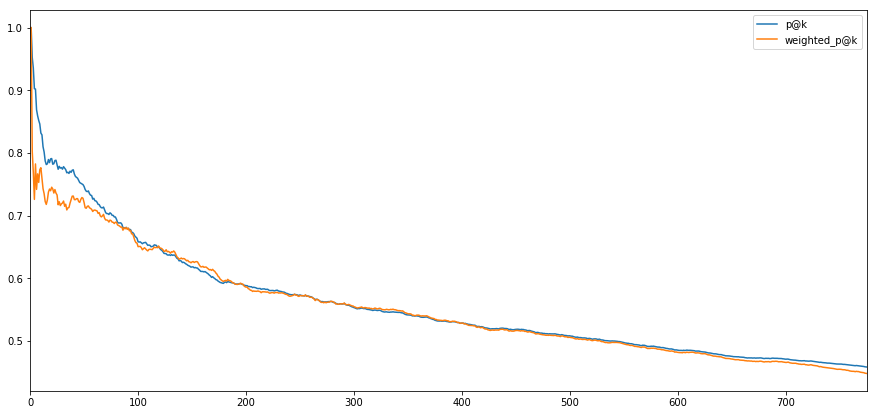

In [58]:
fig, ax = plt.subplots(figsize=(15,7))
_ = df_results[['p@k', 'weighted_p@k']].plot(ax=ax)